In [1]:
import kagglehub
import shutil
import os
from google.colab import drive

# Download latest version
dataset = kagglehub.dataset_download("seanscully29/animals-and-pokemons")\

print("Path to dataset files:", dataset)

100%|██████████| 151M/151M [00:01<00:00, 105MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/seanscully29/animals-and-pokemons/versions/1


In [2]:
# Define local save path
local_path = "./pokemon_animal_dataset"

# Ensure the local directory exists
os.makedirs(local_path, exist_ok=True)

# Copy the dataset to the local directory
for item in os.listdir(dataset):
    s = os.path.join(dataset, item)
    d = os.path.join(local_path, item)
    if os.path.isdir(s):
      shutil.copytree(s, d)
    else:
        shutil.copy2(s, d)

print(f"Dataset saved at: {local_path}")

Dataset saved at: ./pokemon_animal_dataset


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [4]:
# Correcting paths
train_dir = "/content/pokemon_animal_dataset/animals_and_pokemons/train"
test_dir = "/content/pokemon_animal_dataset/animals_and_pokemons/test"

# Define ImageDataGenerator for augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Load testing dataset
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 1250 images belonging to 2 classes.
Found 659 images belonging to 2 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification (Cat vs Dog)
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8987 - loss: 0.3289

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.9002 - loss: 0.3242 - val_accuracy: 0.9970 - val_loss: 0.0151
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9877 - loss: 0.0318 - val_accuracy: 0.9954 - val_loss: 0.0314
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9930 - loss: 0.0244 - val_accuracy: 0.9970 - val_loss: 0.0130
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.9982 - loss: 0.0099 - val_accuracy: 0.9970 - val_loss: 0.0067
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.9919 - loss: 0.0270 - val_accuracy: 0.9970 - val_loss: 0.0117


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

    prediction = model.predict(img_array)
    label = "Pokemon" if prediction[0][0] > 0.5 else "Animal"

    # Display the image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {label}", fontsize=14, fontweight='bold')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


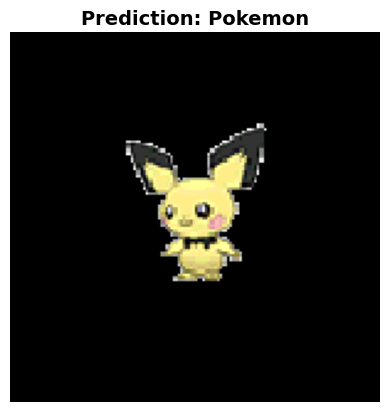

None


In [21]:
# Example usage
img_path = "/content/pokemon_animal_dataset/animals_and_pokemons/train/pokemon/pichu.png"
print(predict_image(img_path))